ID: Identificador único de cada curso vendido.

Nome do Curso: Nome do curso vendido na plataforma.

Quantidade de Vendas: Número de vendas realizadas para cada curso.

Preço Unitário: Preço unitário do curso.

Data: Data da venda do curso.

- Calcular a receita total gerada pela venda dos cursos.
- Identificar o curso com o maior número de vendas.
- Visualizar a distribuição das vendas ao longo do tempo através de gráficos.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
vend_cursos = pd.read_csv(r"..\data\venda_cursos_online.csv.txt",index_col=0)

In [73]:
vend_cursos.head()

,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
ID,,,,
1,Introdução à Programação em Python,50,39.9,2023-01-01
2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
4,Introdução ao Machine Learning,15,99.9,2023-01-04
5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


In [74]:
vend_cursos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do Curso         25 non-null     object 
 1   Quantidade de Vendas  25 non-null     int64  
 2   Preço Unitário        25 non-null     float64
 3   Data                  25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [75]:
vend_cursos.describe()

,Quantidade de Vendas,Preço Unitário
count,25.000000,25.000000
mean,17.960000,83.900000
std,10.921996,21.984843
min,5.000000,39.900000
25%,10.000000,69.900000
50%,15.000000,79.900000
75%,20.000000,99.900000
max,50.000000,119.900000


In [76]:
# Vou alterar o tipo de dados da coluna 'Data' para facilitar manipulações futuras
vend_cursos['Data'] = pd.to_datetime(vend_cursos['Data'])

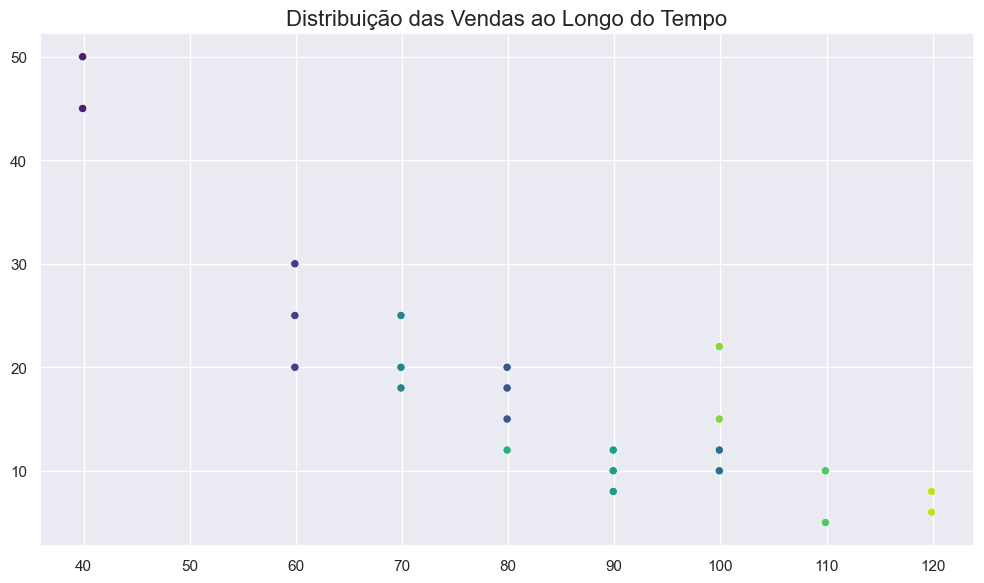

In [91]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=vend_cursos, x="Preço Unitário", y="Quantidade de Vendas",hue='Nome do Curso', palette='viridis',legend=False)
plt.title('Distribuição das Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

## <a> 1. Receita total gerada pela venda dos cursos </a>

In [77]:
receita_total = (vend_cursos["Quantidade de Vendas"] * vend_cursos["Preço Unitário"]).sum()
print(f"A receita_total gerada pelos cursos foi de: R$ {receita_total:.2f}")

A receita_total gerada pelos cursos foi de: R$ 32735.10


## <a> 2. Curso com o maior número de vendas </a>

In [134]:
vendas_totais_curso = vend_cursos.groupby('Nome do Curso')[['Quantidade de Vendas']].sum().sort_values(by='Quantidade de Vendas', ascending=False).reset_index()
vendas_totais_curso

In [137]:
max_venda = vendas_totais_curso.loc[vendas_totais_curso['Quantidade de Vendas'].idxmax()]
print(f"O curso mais vendido foi {max_venda['Nome do Curso']} com {max_venda['Quantidade de Vendas']} vendas")

O curso mais vendido foi Introdução à Programação em Python com 95 vendas


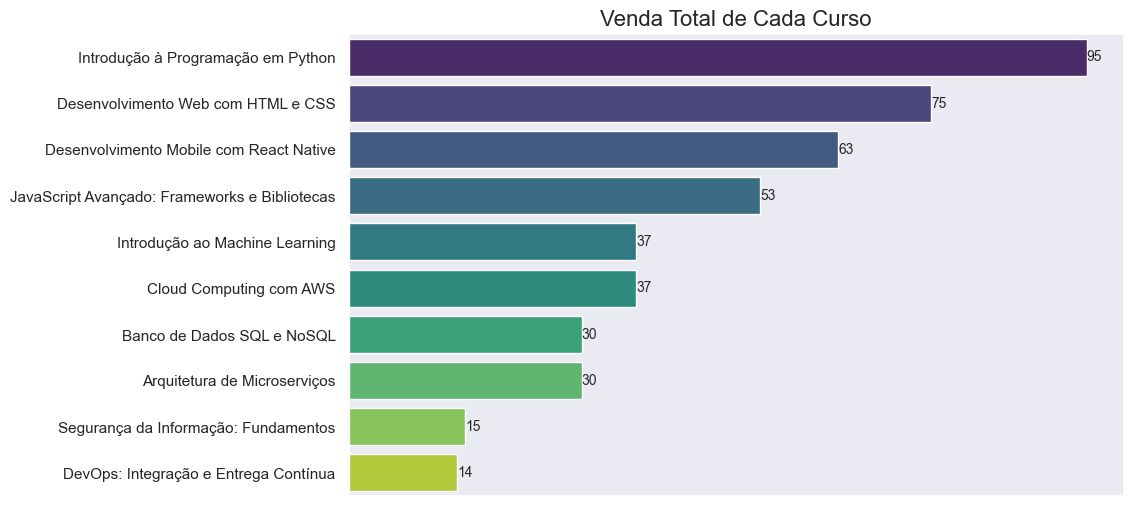

In [159]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="dark")
ax = sns.barplot(x="Quantidade de Vendas",y="Nome do Curso",data=vendas_totais_curso,hue='Nome do Curso', palette='viridis', legend=False)
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f')
plt.title('Venda Total de Cada Curso', fontsize=16)
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels([])
plt.show()

## <a> 3. Visualizando a Distribuição das Vendas ao Longo do Tempo </a>

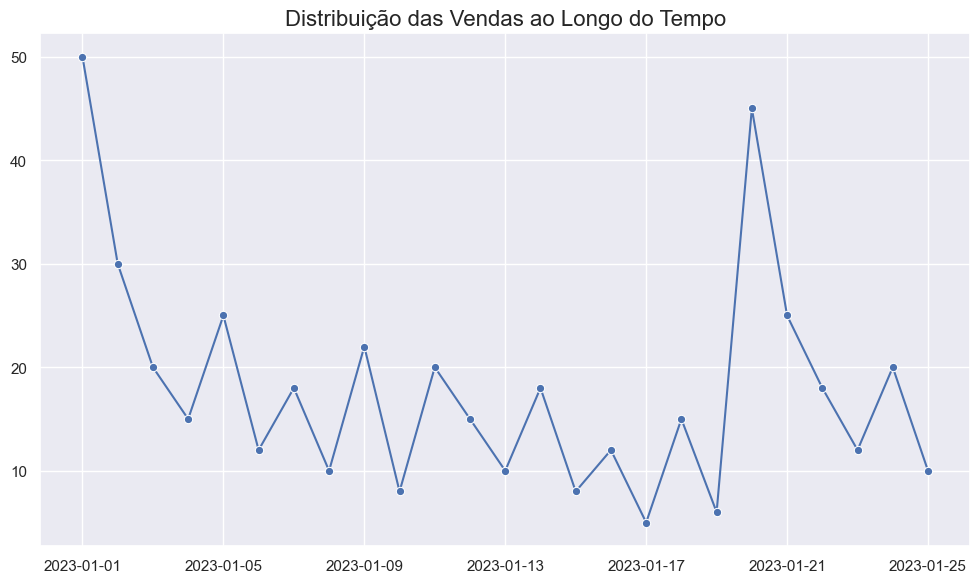

In [80]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x="Data", y="Quantidade de Vendas", data=vend_cursos, marker="o", dashes=False)
plt.title('Distribuição das Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

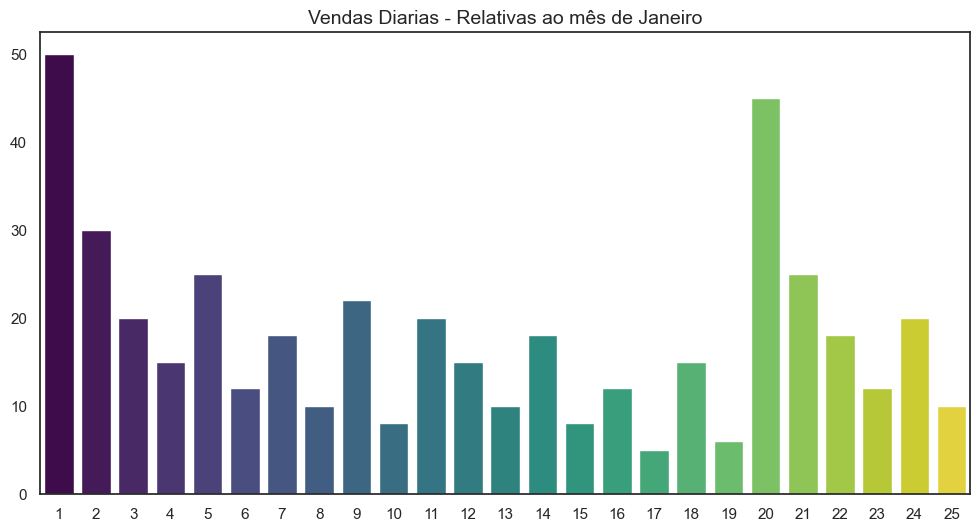

In [83]:
vend_cursos['Dia'] = vend_cursos['Data'].dt.day
vendas_diarias = vend_cursos.groupby('Dia')['Quantidade de Vendas'].sum().reset_index()
sns.set_theme(style="white")

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_diarias, x='Dia', y='Quantidade de Vendas', hue='Dia', palette='viridis', legend=False)
plt.title('Vendas Diarias - Relativas ao mês de Janeiro',fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()
